<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/bigcon/blob/master/BigCon1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/HWANG-HOE-SUN/GitTest.git

Cloning into 'GitTest'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

KeyboardInterrupt: ignored

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
# 한글출력
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving naver_쇼핑데이터랩.csv to naver_쇼핑데이터랩 (1).csv
User uploaded file "naver_쇼핑데이터랩.csv" with length 5475 bytes


In [ ]:
import io
import csv
sellData = pd.read_excel(uploaded['2019실적데이터.xlsx'],header=1)
watchData = pd.read_excel(uploaded['2019시청률데이터.xlsx'],header=1)
naver = pd.read_csv('naver_쇼핑데이터랩.csv')
App_annie = pd.read_excel(uploaded['ns홈쇼핑앱애니.xlsx'])

In [217]:
naver.head()

,date,sellratio
0,2019-01-01,60
1,2019-01-02,58
2,2019-01-03,55
3,2019-01-04,51
4,2019-01-05,57


In [ ]:
# Weather = pd.read_csv(io.BytesIO(uploaded['기상청정보19-20.csv'])) 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **판매데이터 처리**

In [ ]:
print(sellData.shape)
print(sellData.info())
sellData.head(10) # 노출(분) 같은거 귀찮아서 NaN으로 해둔게 많다. 엑셀에서 or 여기서 처리해야 할듯.

(38309, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    38309 non-null  datetime64[ns]
 1   노출(분)   21525 non-null  float64       
 2   마더코드    38309 non-null  int64         
 3   상품코드    38309 non-null  int64         
 4   상품명     38309 non-null  object        
 5   상품군     38309 non-null  object        
 6   판매단가    38309 non-null  int64         
 7   취급액     37372 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.3+ MB
None


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0
5,2019-01-01 06:40:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,9337000.0
6,2019-01-01 07:00:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,6819000.0
7,2019-01-01 07:20:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,15689000.0
8,2019-01-01 07:40:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,25370000.0
9,2019-01-01 08:00:00,20.0,100808,202377,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900,16133000.0


In [ ]:
sellData['상품군'].value_counts()

주방      6604
가전      6479
의류      4340
속옷      3919
잡화      3891
농수축     3884
생활용품    2877
가구      2614
이미용     1305
무형       937
건강기능     790
침구       669
Name: 상품군, dtype: int64

In [ ]:
print(watchData.shape)
print(watchData.info())
watchData.head(5)

(1441, 367)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Columns: 367 entries, 시간대 to 2019-01-01 to 2019-12-31
dtypes: float64(366), object(1)
memory usage: 4.0+ MB
None


,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-12,2019-01-13,2019-01-14,2019-01-15,2019-01-16,2019-01-17,2019-01-18,2019-01-19,2019-01-20,2019-01-21,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,2019-02-02,2019-02-03,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,...,2019-11-23,2019-11-24,2019-11-25,2019-11-26,2019-11-27,2019-11-28,2019-11-29,2019-11-30,2019-12-01,2019-12-02,2019-12-03,2019-12-04,2019-12-05,2019-12-06,2019-12-07,2019-12-08,2019-12-09,2019-12-10,2019-12-11,2019-12-12,2019-12-13,2019-12-14,2019-12-15,2019-12-16,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-21,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
0,02:00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.048,0.0,0.0,0.0,0.0,0.018,0.000,0.035,0.030,0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.003
1,02:01,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.022,0.0,0.0,0.0,0.000,0.048,0.0,0.0,0.0,0.0,0.018,0.000,0.035,0.030,0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.012,0.003
2,02:02,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.022,0.0,0.0,0.0,0.000,0.033,0.0,0.0,0.0,0.0,0.018,0.018,0.035,0.067,0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.004
3,02:03,0.0,0.0,0.014,0.0,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.022,0.0,0.0,0.0,0.000,0.033,0.0,0.0,0.0,0.0,0.018,0.018,0.035,0.067,0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012,0.0,0.0,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004
4,02:04,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.012,0.033,0.0,0.0,0.0,0.0,0.018,0.000,0.035,0.067,0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012,0.0,0.0,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004


# 불필요 Data제거 및 결측치 처리

# 불필요 데이터(판매실적=0)







In [ ]:
sellData.columns

Index(['방송일시', '노출(분)', '마더코드', '상품코드', '상품명', '상품군', '판매단가', '취급액'], dtype='object')

In [ ]:
print(sellData[(sellData['상품군']=='무형')]) #937개가 무형제품.
sellData[(sellData['판매단가']==0)] #상품군 무형인 Data들은 모두 판매단가도 0임 이것들을 지우겠다.

                     방송일시      노출(분)    마더코드  ...  상품군 판매단가 취급액
2318  2019-01-25 19:00:00  60.000000  100507  ...   무형    0 NaN
2845  2019-01-31 18:00:00  60.000000  100507  ...   무형    0 NaN
3332  2019-02-05 18:00:00  60.000000  100507  ...   무형    0 NaN
6570  2019-03-09 00:00:00  20.000000  100324  ...   무형    0 NaN
6571  2019-03-09 00:20:00  20.000000  100324  ...   무형    0 NaN
...                   ...        ...     ...  ...  ...  ...  ..
38304 2020-01-01 00:20:00  20.000000  100073  ...   무형    0 NaN
38305 2020-01-01 00:40:00  20.000000  100073  ...   무형    0 NaN
38306 2020-01-01 01:00:00  20.000000  100073  ...   무형    0 NaN
38307 2020-01-01 01:20:00  20.000000  100490  ...   무형    0 NaN
38308 2020-01-01 01:40:00  17.166667  100490  ...   무형    0 NaN

[937 rows x 8 columns]


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
2318,2019-01-25 19:00:00,60.000000,100507,201567,TCOM_처브치아보험,무형,0,NaN
2845,2019-01-31 18:00:00,60.000000,100507,201567,TCOM_처브치아보험,무형,0,NaN
3332,2019-02-05 18:00:00,60.000000,100507,201567,TCOM_처브치아보험,무형,0,NaN
6570,2019-03-09 00:00:00,20.000000,100324,201095,온라인투어 동남아 나트랑/빈펄랜드 (190309),무형,0,NaN
6571,2019-03-09 00:20:00,20.000000,100324,201095,온라인투어 동남아 나트랑/빈펄랜드 (190309),무형,0,NaN
...,...,...,...,...,...,...,...,...
38304,2020-01-01 00:20:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38305,2020-01-01 00:40:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38306,2020-01-01 01:00:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38307,2020-01-01 01:20:00,20.000000,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN


In [ ]:
Selling = sellData[sellData['판매단가']!=0]
Selling

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0
...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40:00,NaN,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0
38300,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0
38301,2020-01-01 00:00:00,NaN,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0
38302,2020-01-01 00:00:00,NaN,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0


In [ ]:
from datetime import datetime,timedelta

# 결측치( 노출('분) )

In [ ]:
testsell = Selling.copy() #testsell에서 노출(분) 채우는 실험을 해보겠음.
Time_NaN_Index = testsell[testsell['노출(분)'].isnull()].index # 노출(분)이 채워지지 않은놈들의 인덱스

In [ ]:
#노출(분) 채우는규칙? (같은 마더코드의) 같은 시간대인 놈의 노출(분)으로 채우면 될 듯.
#근데 한 시간대에 여러 마더코드가 있지 않으니.. 그냥 같은 시간대에 방송된 다른 notnull 노출(분)값을 넣자.
groupmax = testsell["노출(분)"].groupby(testsell['방송일시']).max()

# groupmax.index는 방송일시가 들어있다.
# Time_NaN_BroadTime에도 방송일시가 들어있다
# Time_NaN_Index엔 노출(분) Null인 인덱스(주소)가 들어있다.
# groupmax엔 방송일시별로 노출(분)이 들어있다.

for i in Time_NaN_Index:
  testsell['노출(분)'][i] = groupmax[testsell['방송일시'][i]]
testsell[348:] # 성공적으로 결측치를 대체했다.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
348,2019-01-05 01:20:00,20.0,100293,200949,무이자[가이거] 제니스시계 주얼리세트,잡화,139000,15561000.0
349,2019-01-05 01:40:00,17.1,100293,200952,일시불[가이거] 제니스시계 주얼리세트,잡화,129000,20633000.0
350,2019-01-05 01:40:00,17.1,100293,200949,무이자[가이거] 제니스시계 주얼리세트,잡화,139000,8495000.0
351,2019-01-05 06:00:00,20.0,100267,200883,스칼프솔루션 트리트먼트 패키지,이미용,50900,4976000.0
352,2019-01-05 06:20:00,20.0,100267,200883,스칼프솔루션 트리트먼트 패키지,이미용,50900,11784000.0
...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0
38300,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0
38301,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0
38302,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0


In [ ]:
Selling = testsell
del(testsell)
Selling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 38303
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    37372 non-null  datetime64[ns]
 1   노출(분)   37372 non-null  float64       
 2   마더코드    37372 non-null  int64         
 3   상품코드    37372 non-null  int64         
 4   상품명     37372 non-null  object        
 5   상품군     37372 non-null  object        
 6   판매단가    37372 non-null  int64         
 7   취급액     37372 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 3.8+ MB


# 실적데이터 전체 기본분석(EDA)

In [ ]:
#날짜데이터 분리
Selling["방송일시_년도"] = Selling["방송일시"].dt.year
Selling["방송일시_월"] = Selling["방송일시"].dt.month
Selling["방송일시_일"] = Selling["방송일시"].dt.day
Selling["방송일시_시"] = Selling["방송일시"].dt.hour
Selling["방송일시_분"] = Selling["방송일시"].dt.minute
Selling["방송일시_초"] = Selling["방송일시"].dt.second
Selling["방송일시_요일"] = Selling["방송일시"].dt.dayofweek
print(Selling.shape)
Selling[["방송일시", "방송일시_년도","방송일시_월","방송일시_일","방송일시_시","방송일시_분","방송일시_초","방송일시_요일"]].head() #0-월요일 ~ 6-일요일

(37372, 15)


,방송일시,방송일시_년도,방송일시_월,방송일시_일,방송일시_시,방송일시_분,방송일시_초,방송일시_요일
0,2019-01-01 06:00:00,2019,1,1,6,0,0,1
1,2019-01-01 06:00:00,2019,1,1,6,0,0,1
2,2019-01-01 06:20:00,2019,1,1,6,20,0,1
3,2019-01-01 06:20:00,2019,1,1,6,20,0,1
4,2019-01-01 06:40:00,2019,1,1,6,40,0,1


In [ ]:
#파생변수 생성1 - 주문량
Selling['주문량']= Selling['취급액']/Selling['판매단가']
Selling['주문량'].head()

0     52.606516
1    109.548872
2     81.754386
3    174.310777
4    167.218045
Name: 주문량, dtype: float64

In [ ]:
#파생변수 생성2 - 계절
# 계절 열 생성
Selling["계절"] = ""
Selling.head()

for i in Selling.index:
  if 3 <= Selling['방송일시_월'][i] <= 5:
    Selling['계절'][i] = 1
  elif 6<= Selling['방송일시_월'][i] <= 8:
    Selling['계절'][i] = 2
  elif 9<= Selling['방송일시_월'][i] <= 11:
    Selling['계절'][i] = 3
  else:
    Selling["계절"][i] = 4 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_laun

# **시각화**

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49569 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_

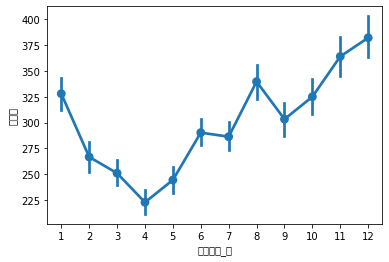

In [ ]:
sns.pointplot(data=Selling,x="방송일시_월",y="주문량") #방송월별 주문량평균 그래프
# Selling.groupby('주문량)['방송일시_월'].mean() 이 결과와 동일

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text

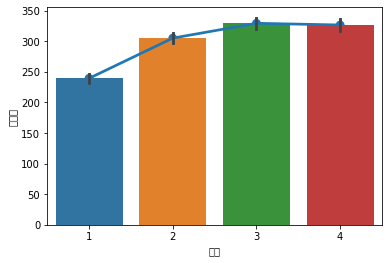

In [ ]:
sns.pointplot(data=Selling,x="계절",y="주문량") #계절별 주문량 그래프 3(가을)에 제일 많고 1(봄)에 제일 적다.
sns.barplot(data=Selling,x="계절",y="주문량")

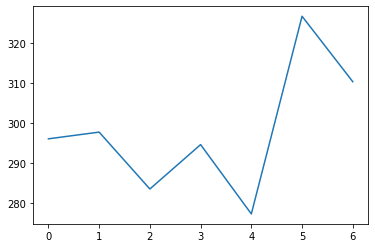

In [ ]:
 # 요일별 취급액 합계 시각화
plt.plot(Selling.groupby("방송일시_요일")["주문량"].sum()/Selling.groupby("방송일시_요일")["주문량"].count())

In [218]:
(Selling.groupby("방송일시_요일")["주문량"].sum()/Selling.groupby("방송일시_요일")["주문량"].count()).describe()

count      7.000000
mean     298.018723
std       16.500974
min      277.245528
25%      289.038046
50%      296.041565
75%      304.025353
max      326.717170
Name: 주문량, dtype: float64

# **시청률데이터 처리**

In [ ]:
# 실적에 대한 정의를 확실히 하고... 본질적으로 우리가 예측하는것이 어느시점에 발생하는 행위인지 정의해야 될듯.
# 시청률 집계방식-> 8시2분에 10%라면, 그 이전에 시청하던 시청자수를 집계해서 얻은 수치임(내가 아는바에 의하면)
# 실적이 발생하는 시점? 결제가 발생해서 실제로 수익이 난 시점! 시청률 발생시점, 집계시점, 실적시점이 다 서로 다를 수 있을거 같음.
# 근데 우리가 예측할건 분당 실적이다... 어떤 시점의 어느 행위를 예측하는가? 어떻게 실적을 분별로 예측할까.

In [ ]:
# 날씨 앱애니(유지비율) 공휴일 
# 

# 상품군별 분리 및 분석

---


1.   주방
2.   가전
3.   의류
4.   속옷
5.   잡화
6.   농수축
7.   생활용품
8.   가구
9.   이미용
10.  건강기능
11.  침구




In [ ]:
Selling['상품군'].value_counts()

In [ ]:
data = Selling.copy()
# 세환님 코드
funiture=[]#가구
HomeAppliances=[]#가전
Hearth=[]#건강기능
Agriculture=[]#농수축
Intangible=[]#무형
Householdgood=[]#생활용품
innerwear=[]#속옷
cloths=[]#의류
beauty=[]#미용
stuff=[]#잡화
kitchen=[]#주방
bedding=[]#침구

for i in range(len(data)):
    if data['상품군'].iloc[i] == "의류" :
        cloths.append(data['취급액'].iloc[i]/data['판매단가'].iloc[i])
    elif data['상품군'].iloc[i] == "가구" :
        funiture.append(data['취급액'].iloc[i]/data['판매단가'].iloc[i])
    elif data['상품군'].iloc[i] == "가전" :
        HomeAppliances.append(data['취급액'].iloc[i]/data['판매단가'].iloc[i])
    elif data['상품군'].iloc[i] == "건강기능" :
        Hearth.append(data['취급액'].iloc[i]/data['판매단가'].iloc[i])
    elif data['상품군'].iloc[i] == "농수축" :
        Agriculture.append(data['취급액'].iloc[i]/data['판매단가'].iloc[i])
    elif data['상품군'].iloc[i] == "무형" :
        Intangible.append(data['취급액'].iloc[i]/data['판매단가'].iloc[i])
    elif data['상품군'].iloc[i] == "생활용품" :
        Householdgood.append(data['취급액'].iloc[i]/data['판매단가'].iloc[i])
    elif data['상품군'].iloc[i] == "속옷" :
        innerwear.append(data['취급액'].iloc[i]/data['판매단가'].iloc[i])
    elif data['상품군'].iloc[i] == "이미용" :
        beauty.append(data['취급액'].iloc[i]/data['판매단가'].iloc[i])
    elif data['상품군'].iloc[i] == "잡화" :
        stuff.append(data['취급액'].iloc[i]/data['판매단가'].iloc[i])
    elif data['상품군'].iloc[i] == "주방" :
        kitchen.append(data['취급액'].iloc[i]/data['판매단가'].iloc[i])
    elif data['상품군'].iloc[i] == "침구" :
        bedding.append(data['취급액'].iloc[i]/data['판매단가'].iloc[i])

In [ ]:
plt.plot(funiture) #가구

In [ ]:
funiture

In [ ]:
data_Mother_grouped = data.groupby('마더코드')
MoMCodeGroup = data_Mother_grouped.sum()['주문량'] 

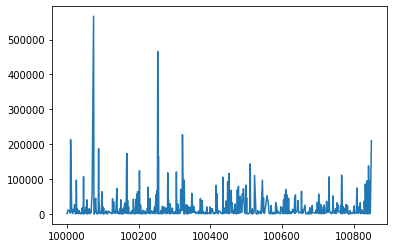

In [ ]:
plt.plot(MoMCodeGroup)

In [ ]:
data_Multi_grouped = data.groupby(['마더코드','상품군'])
MultiGroup = data_Multi_grouped['주문량'].sum()

In [ ]:
Furni_by_MoM = MultiGroup[:,'가구']
cloths_by_MoM = MultiGroup[:,'의류']
HomeAppliances_by_MoM = MultiGroup[:,'가전']
Hearth_by_MoM = MultiGroup[:,'건강기능']
Agriculture_by_MoM = MultiGroup[:,'농수축']
Intangible_by_MoM = MultiGroup[:,'가전']
Householdgood_by_MoM = MultiGroup[:,'생활용품']
innerwear_by_MoM = MultiGroup[:,'속옷']
beauty_by_MoM = MultiGroup[:,'이미용']
stuff_by_MoM = MultiGroup[:,'잡화']
kitchen_by_MoM = MultiGroup[:,'주방']
bedding_by_MoM = MultiGroup[:,'침구']

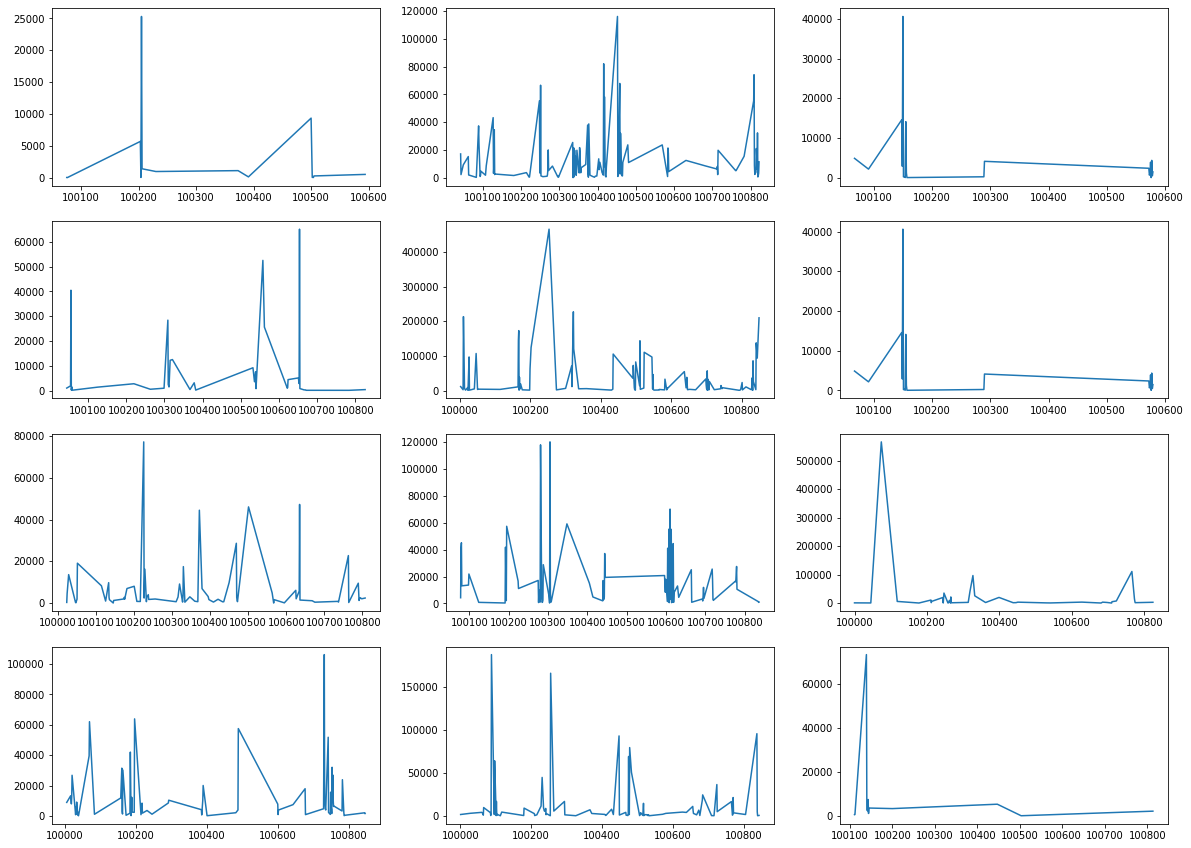

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,15)


plt.subplot2grid((4,3),(0,0)); plt.plot(Furni_by_MoM)
plt.subplot2grid((4,3),(0,1)); plt.plot(cloths_by_MoM)
plt.subplot2grid((4,3),(0,2)); plt.plot(HomeAppliances_by_MoM)
plt.subplot2grid((4,3),(1,0)); plt.plot(Hearth_by_MoM)
plt.subplot2grid((4,3),(1,1)); plt.plot(Agriculture_by_MoM)
plt.subplot2grid((4,3),(1,2)); plt.plot(Intangible_by_MoM)
plt.subplot2grid((4,3),(2,0)); plt.plot(Householdgood_by_MoM)
plt.subplot2grid((4,3),(2,1)); plt.plot(innerwear_by_MoM)
plt.subplot2grid((4,3),(2,2)); plt.plot(beauty_by_MoM)
plt.subplot2grid((4,3),(3,0)); plt.plot(stuff_by_MoM)
plt.subplot2grid((4,3),(3,1)); plt.plot(kitchen_by_MoM)
plt.subplot2grid((4,3),(3,2)); plt.plot(bedding_by_MoM)

# 1.주방용품

1년간 일별 주문량 합계 (DATE변수추가)

In [ ]:
New_data = Selling.copy()
New_data['DATE'] = New_data['방송일시'].map(lambda x: 10000*x.to_pydatetime().year + 100*x.to_pydatetime().month + x.to_pydatetime().day)

In [ ]:
grouped_day_item = New_data.groupby(['상품군','DATE']).sum()
grouped_day_item

노출(분)     마더코드     상품코드  ...  방송일시_초  방송일시_요일          주문량
상품군 DATE                               ...                              
가구  20190201  180.0   901845  1806588  ...       0       36   285.268734
    20190204  180.0   901845  1806588  ...       0        0   253.090929
    20190206  180.0   901845  1806588  ...       0       18   303.985646
    20190208  180.0   901845  1806588  ...       0       36   373.762817
    20190212  360.0  1809000  3627108  ...       0       18   295.710771
...             ...      ...      ...  ...     ...      ...          ...
침구  20191111  240.0  1201716  2404746  ...       0        0  1324.517211
    20191113  240.0  1201716  2404746  ...       0       24  1512.708542
    20191119  240.0  1201716  2404746  ...       0       12  1525.351548
    20191121  240.0  1201716  2404746  ...       0       36  1637.059339
    20191124  240.0  1201716  2404746  ...       0       72  1500.644634

[2984 rows x 13 columns]

In [ ]:
grouped_day_item = grouped_day_item['취급액']/grouped_day_item['판매단가']
grouped_day_item = pd.DataFrame(grouped_day_item)

In [ ]:
Selling_Kitchen = Selling[Selling['상품군']=='주방']
print(Selling_Kitchen.info())
Selling_Kitchen.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6604 entries, 20 to 38303
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   방송일시     6604 non-null   datetime64[ns]
 1   노출(분)    6604 non-null   float64       
 2   마더코드     6604 non-null   int64         
 3   상품코드     6604 non-null   int64         
 4   상품명      6604 non-null   object        
 5   상품군      6604 non-null   object        
 6   판매단가     6604 non-null   int64         
 7   취급액      6604 non-null   float64       
 8   방송일시_년도  6604 non-null   int64         
 9   방송일시_월   6604 non-null   int64         
 10  방송일시_일   6604 non-null   int64         
 11  방송일시_시   6604 non-null   int64         
 12  방송일시_분   6604 non-null   int64         
 13  방송일시_초   6604 non-null   int64         
 14  방송일시_요일  6604 non-null   int64         
 15  주문량      6604 non-null   float64       
 16  계절       6604 non-null   object        
dtypes: datetime64[ns](1), float64(3

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,방송일시_년도,방송일시_월,방송일시_일,방송일시_시,방송일시_분,방송일시_초,방송일시_요일,주문량,계절
20,2019-01-01 12:00:00,20.0,100088,200236,에코라믹 통주물 스톤 냄비세트,주방,60900,33823000.0,2019,1,1,12,0,0,1,555.385878,4
21,2019-01-01 12:20:00,20.0,100088,200236,에코라믹 통주물 스톤 냄비세트,주방,60900,59083000.0,2019,1,1,12,20,0,1,970.164204,4
22,2019-01-01 12:40:00,20.0,100088,200236,에코라믹 통주물 스톤 냄비세트,주방,60900,99235000.0,2019,1,1,12,40,0,1,1629.474548,4
79,2019-01-02 10:00:00,20.0,100448,202098,일시불 쿠첸 풀스텐 압력밥솥 10인용 (A1),주방,158000,7239000.0,2019,1,2,10,0,0,2,45.816456,4
80,2019-01-02 10:00:00,20.0,100448,202093,무이자 쿠첸 풀스텐 압력밥솥 10인용(A1),주방,168000,8951000.0,2019,1,2,10,0,0,2,53.279762,4


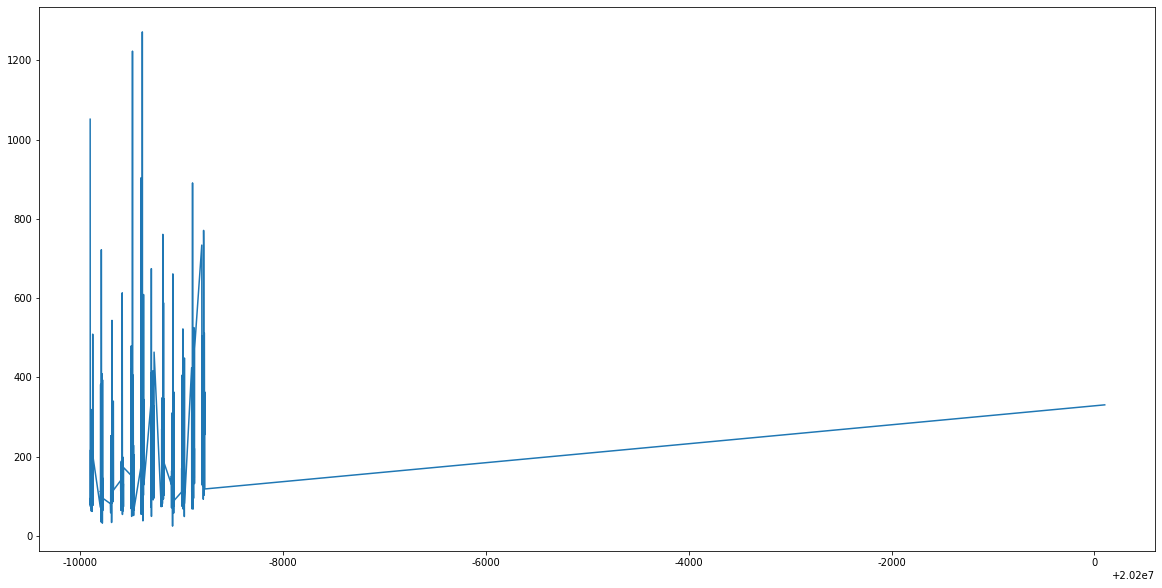

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)
# 잘못된 그림 예시
plt.plot(grouped_day_item.xs('주방')[0]) # 20200101의 날짜값때문에 오른쪽끝으로 쏠리는 현상이 발생!

In [ ]:
kitchen_date = grouped_day_item.xs('주방').index

In [ ]:
for i in range(len(kitchen_date)-1):
  if kitchen_date[i+1] - kitchen_date[i]>1:
    print(kitchen_date[i+1]) # 20191201 과 20200101사이의 숫자간 거리가 멀어서 그래프 플롯이 이상하다.

In [ ]:
kitchen_sell_bydate = grouped_day_item.xs('주방')
print(kitchen_sell_bydate)

                    0
DATE                 
20190101  1051.674877
20190102    78.591523
20190103    94.933461
20190104    74.377903
20190105   217.143648
...               ...
20191228   254.800190
20191229   274.747155
20191230   363.341094
20191231   118.530814
20200101   330.819018

[358 rows x 1 columns]


In [ ]:
kitchen_sell_bydate = kitchen_sell_bydate.rename(index={20200101:20191232}) #20201231 -> 20201232로 바꿔서 그래프를 다시 그리겠다.

In [ ]:
kitchen_sell_bydate

,0
DATE,
20190101,1051.674877
20190102,78.591523
20190103,94.933461
20190104,74.377903
20190105,217.143648
...,...
20191228,254.800190
20191229,274.747155
20191230,363.341094


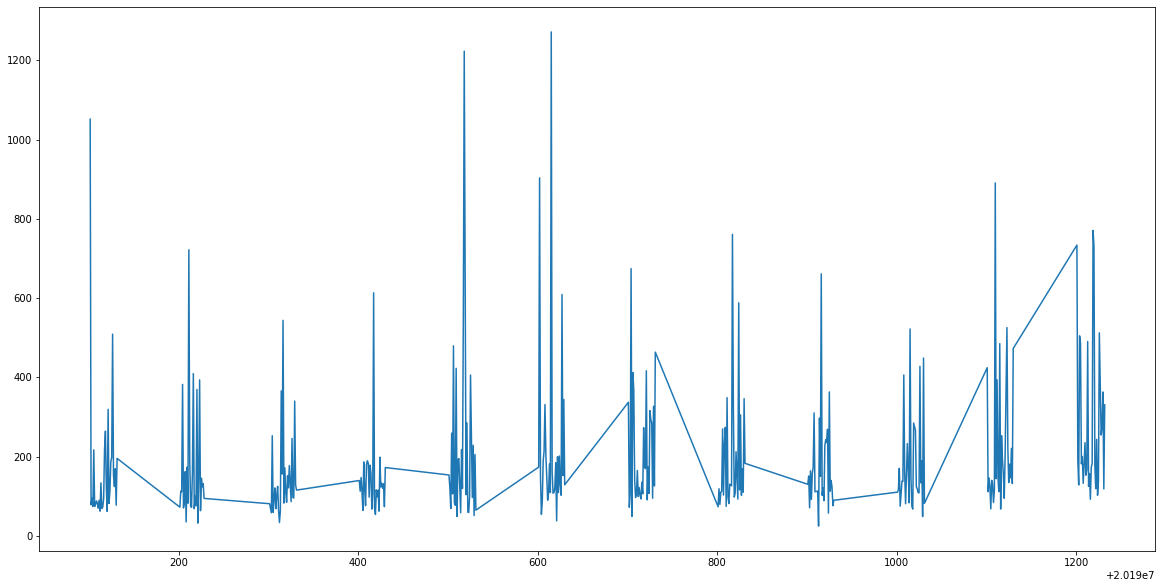

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)

plt.plot(kitchen_sell_bydate)
# ※plt.bar(kitchen_sell_bydate.index, kitchen_sell_bydate[0])으로 확인(막대그래프)시 중간중간 선값이 없음. 즉, 이 그림에서 중간연결선은 허구(없는데이터)

In [ ]:
bigsell = kitchen_sell_bydate[0][kitchen_sell_bydate[0]>600]
smallsell = kitchen_sell_bydate[0][kitchen_sell_bydate[0]<=600]  #각각에 대해 plot을 그려 봤다.(큰차인 없음. small의 경우)

# 2.의류

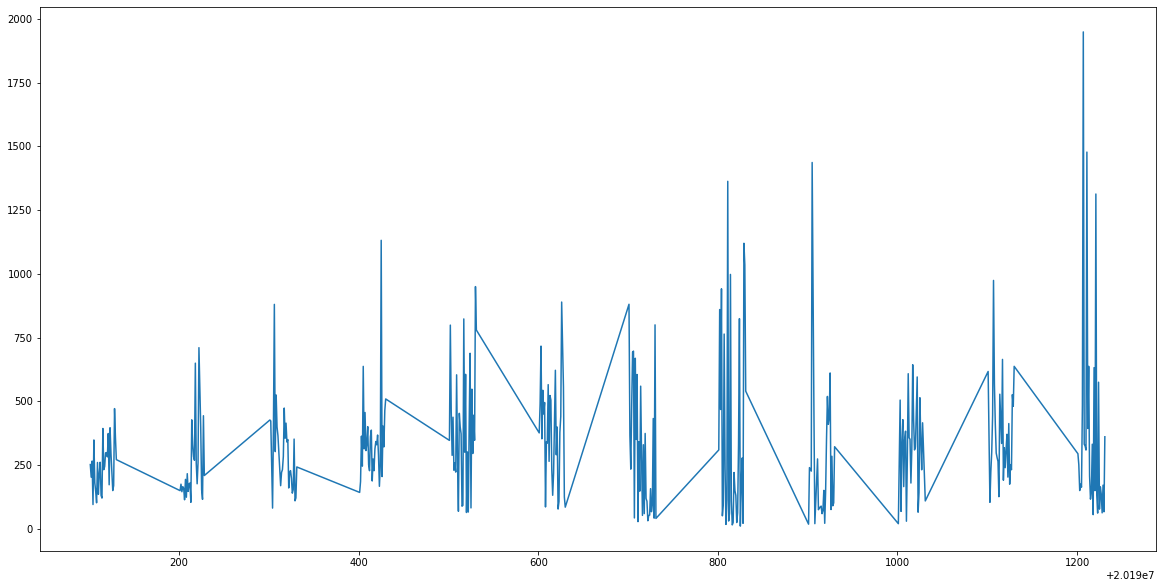

In [ ]:
plt.plot(grouped_day_item.xs('의류')[0])

# naver 쇼핑랩 데이터와 비교(연관성)

In [ ]:
X2 = grouped_day_item.xs('의류').values
print(len(X2))
len(naver)

355


365

In [ ]:
grouped_day_item.xs('의류').index

Int64Index([20190101, 20190102, 20190103, 20190104, 20190105, 20190106,
            20190107, 20190108, 20190109, 20190110,
            ...
            20191222, 20191223, 20191224, 20191225, 20191226, 20191227,
            20191228, 20191229, 20191230, 20191231],
           dtype='int64', name='DATE', length=355)

In [ ]:
Missing=['2019-01-31','2019-02-23','2019-06-27','2019-09-03','2019-09-06',
         '2019-09-09','2019-09-10','2019-10-21','2019-10-30','2019-11-15']

In [ ]:
for i in grouped_day_item.xs('의류').index: #의류측 판매결측자료 찾기
  print(i)

In [ ]:
naver.head()

,date,sellratio
0,2019-01-01,60
1,2019-01-02,58
2,2019-01-03,55
3,2019-01-04,51
4,2019-01-05,57


In [ ]:
s1 = naver['date']
s2 = pd.Series(Missing)
real_sell_date = np.setdiff1d(s1,s2) #naver카드사날짜중, Ns결측날짜만 제거해서 다시 저장

In [ ]:
len(real_sell_date)

355

In [ ]:
naver['date'].isin(real_sell_date) # real_sell_date에 해당되는 날짜만 boolean으로 뽑아보겠음.

0      True
1      True
2      True
3      True
4      True
       ... 
360    True
361    True
362    True
363    True
364    True
Name: date, Length: 365, dtype: bool

In [ ]:
naver[naver['date'].isin(real_sell_date)]

,date,sellratio
0,2019-01-01,60
1,2019-01-02,58
2,2019-01-03,55
3,2019-01-04,51
4,2019-01-05,57
...,...,...
360,2019-12-27,47
361,2019-12-28,53
362,2019-12-29,61
363,2019-12-30,51


# Naver쇼핑랩 vs NS쇼핑 실적비교 (Scaling과정 필요)

쇼핑랩 실적-> 스케일링 최고점을 100으로 스케일링
이후 얼마나 추세가 비슷한지 비교.

#**Validation Set 찾기**

In [ ]:
data = pd.read_excel('2020평가데이터.xlsx',header=1)

In [ ]:
# 평가데이터 전처리
from datetime import datetime,timedelta

data = data[data['판매단가']!=0]

Data_Time_NaN_Index = data[data['노출(분)'].isnull()].index # 노출(분)이 채워지지 않은놈들의 인덱스
data_groupmax = data["노출(분)"].groupby(data['방송일시']).max()
for i in Data_Time_NaN_Index:
  data['노출(분)'][i] = data_groupmax[data['방송일시'][i]]
data[348:] # 성공적으로 결측치를 대체했다.

#파생변수 생성1 - 주문량
data['주문량']= data['취급액']/data['판매단가']
data['주문량'].head()

#파생변수 생성2 - 계절
# 계절 열 생성
data["계절"] = ""
data.head()

#날짜데이터 분리
data["방송일시_년도"] = data["방송일시"].dt.year
data["방송일시_월"] = data["방송일시"].dt.month
data["방송일시_일"] = data["방송일시"].dt.day
data["방송일시_시"] = data["방송일시"].dt.hour
data["방송일시_분"] = data["방송일시"].dt.minute
data["방송일시_초"] = data["방송일시"].dt.second
data["방송일시_요일"] = data["방송일시"].dt.dayofweek

for i in data.index:
  if 3 <= data['방송일시_월'][i] <= 5:
    data['계절'][i] = 1
  elif 6<= data['방송일시_월'][i] <= 8:
    data['계절'][i] = 2
  elif 9<= data['방송일시_월'][i] <= 11:
    data['계절'][i] = 3
  else:
    data["계절"][i] = 4 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# 마더코드 유사도 비교

In [ ]:
Train_Mothercode = Selling['마더코드']
Test_Mothercode = data['마더코드']

0        False
1        False
2        False
3        False
4        False
         ...  
38299     True
38300     True
38301     True
38302     True
38303     True
Name: 방송일시, Length: 37372, dtype: bool

# 외부데이터 수입(강수량, 앱애니)


In [ ]:
gangleung = pd.read_excel('/content/drive/My Drive/빅콘폴더/날씨_실제/강릉날씨.xlsx')
gwangju = pd.read_excel('/content/drive/My Drive/빅콘폴더/날씨_실제/광주날씨.xlsx')
daegu = pd.read_excel('/content/drive/My Drive/빅콘폴더/날씨_실제/대구날씨.xlsx')
daejeon = pd.read_excel('/content/drive/My Drive/빅콘폴더/날씨_실제/대전날씨.xlsx')
busan = pd.read_excel('/content/drive/My Drive/빅콘폴더/날씨_실제/부산날씨.xlsx')
seoul = pd.read_excel('/content/drive/My Drive/빅콘폴더/날씨_실제/서울날씨.xlsx')
suwon = pd.read_excel('/content/drive/My Drive/빅콘폴더/날씨_실제/수원날씨.xlsx')
ulsan = pd.read_excel('/content/drive/My Drive/빅콘폴더/날씨_실제/울산날씨.xlsx')
paju = pd.read_excel('/content/drive/My Drive/빅콘폴더/날씨_실제/파주날씨.xlsx')

,날짜,평균기온,최고기온,최저기온,강수량(mm),신적설(cm),평균풍속(m/s),평균습도(%),운량(1/10),일조시간(Hr),날씨
0,2019-01-01,-0.8,2.9,-2.7,-,-,4.1,26,2.2,6.4,구름조금
1,2019-01-02,0.0,6.3,-3.4,-,-,3.8,21,0.0,9.1,맑음
2,2019-01-03,1.2,6.8,-3.2,-,-,2.7,20,0.0,9.1,맑음
3,2019-01-04,3.8,8.4,0.2,-,-,3.4,25,4.9,7.3,구름조금
4,2019-01-05,1.9,5.1,-1.2,-,-,3.3,37,3.4,8.9,구름조금
...,...,...,...,...,...,...,...,...,...,...,...
583,2020-08-06,24.1,28.3,22.1,5.8,-,1.7,89,9.2,0.4,흐림/비
584,2020-08-07,25.7,28.7,22.2,0.3,-,1.4,77,9.0,0.0,흐림/비
585,2020-08-08,21.9,22.5,21.4,8.4,-,0.6,94,8.5,0.0,흐림/비
586,2020-08-09,23.4,26.2,21.1,1.7,-,0.8,93,9.3,0.0,흐림/비


# 여러 함수 정의(prepare, Mother코드유사도, 상품군 비율계산

In [ ]:
def prepare_data(data, year, month): #데이터프레임, 원하는 년도,월을 넣어서 쪼갬
    mask = (data['방송일시_년도'] == year) & (data['방송일시_월'] == month)
    prepared = data.loc[mask,]
    print(f'Dataframe {year}_{month}_ratio created.')
    return prepared

def prepare_data2(data,startdate,enddate): #데이터프레임
    mask = (data['방송일시']>=startdate) & (data['방송일시']<=enddate)
    prepared = data.loc[mask,]
    #print('Dataframe created.')
    return prepared

def Mother_Similar(code1):
  score = sum(Test_Mothercode.isin(code1))/len(Test_Mothercode)
  print(score)

def How_Ratio(some_data): #some_data= 비교를 원하는 기간의 데이터 프레임 #time=비교할 시점
   return some_data['상품군'].value_counts().fillna(0)/len(some_data)

In [ ]:
Some_Data = prepare_data2(Selling,'2019-07-10','2019-09-10')
Some_Mothercode = Some_Data['마더코드']
Mother_Similar = sum(Test_Mothercode.isin(Some_Mothercode))/len(Test_Mothercode)
print(Mother_Similar)

Dataframe created.
0.4687039764359352


In [ ]:
for i,j in (#7,8월에 대해
            ['2019-07-10','2019-09-10'],['2019-06-20','2019-08-31'],
            ['2019-07-20','2019-09-20'],['2019-06-10','2019-08-31'],
            ['2019-07-01','2019-08-20'],['2019-07-10','2019-08-31'],
            ['2019-07-01','2019-08-10'],['2019-07-20','2019-08-31'],
            ['2019-06-20','2019-09-10'],['2019-06-10','2019-09-20'],
            #6,7월에 대해
            ['2019-06-10','2019-08-10'],['2019-05-20','2019-07-30'],
            ['2019-06-20','2019-08-20'],['2019-05-10','2019-07-30'],
            ['2019-06-01','2019-07-20'],['2019-06-10','2019-07-30'],
            ['2019-06-01','2019-07-10'],['2019-06-20','2019-07-30'],
            ['2019-05-20','2019-08-10'],['2019-05-10','2019-08-20']
            #):
            #1등날짜(06-20, 08-31) +-5
            ['2019-06-20','2019-09-05'],['2019-06-20','2019-08-26'],
            ['2019-06-15','2019-08-31'],['2019-06-05','2019-08-31'],
            ['2019-06-15','2019-09-05'],['2019-06-10', '2019-09-05']
            ):
  Some_Data = prepare_data2(Selling,i,j)
  print(i,j)
  Mother_Similar(Some_Data['마더코드'])

2019-06-20 2019-09-05
0.4414580265095729
2019-06-20 2019-08-26
0.420839469808542
2019-06-15 2019-08-31
0.4525036818851252
2019-06-05 2019-08-31
0.4525036818851252
2019-06-15 2019-09-05
0.45471281296023564
2019-06-10 2019-09-05
0.45471281296023564


In [ ]:
# 월별 마더코드 비교
for i in range(12):
  Selling_month = prepare_data(Selling,2019,i+1)
  Some_Mothercode = Selling_month['마더코드']
  print(i+1,"_Mothercode\t")
  Mother_Similar = sum(Test_Mothercode.isin(Some_Mothercode))/len(Test_Mothercode)
  print(Mother_Similar)

Dataframe 2019_1_ratio created.
1 _Mothercode	
0.20839469808541974
Dataframe 2019_2_ratio created.
2 _Mothercode	
0.21391752577319587
Dataframe 2019_3_ratio created.
3 _Mothercode	
0.28829160530191456
Dataframe 2019_4_ratio created.
4 _Mothercode	
0.29491899852724596
Dataframe 2019_5_ratio created.
5 _Mothercode	
0.3229013254786451
Dataframe 2019_6_ratio created.
6 _Mothercode	
0.3015463917525773
Dataframe 2019_7_ratio created.
7 _Mothercode	
0.38181148748159055
Dataframe 2019_8_ratio created.
8 _Mothercode	
0.36892488954344627
Dataframe 2019_9_ratio created.
9 _Mothercode	
0.33505154639175255
Dataframe 2019_10_ratio created.
10 _Mothercode	
0.3317378497790869
Dataframe 2019_11_ratio created.
11 _Mothercode	
0.35162002945508103
Dataframe 2019_12_ratio created.
12 _Mothercode	
0.3634020618556701


In [ ]:
Some_Mothercode = Selling_month_1['마더코드']

In [ ]:
sum(Test_Mothercode.isin(Some_Mothercode))/len(Test_Mothercode)

0.20839469808541974

In [ ]:
Selling['상품군'].value_counts()

주방      6604
가전      6479
의류      4340
속옷      3919
잡화      3891
농수축     3884
생활용품    2877
가구      2614
이미용     1305
건강기능     790
침구       669
Name: 상품군, dtype: int64

In [ ]:
Selling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 38303
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   방송일시     37372 non-null  datetime64[ns]
 1   노출(분)    37372 non-null  float64       
 2   마더코드     37372 non-null  int64         
 3   상품코드     37372 non-null  int64         
 4   상품명      37372 non-null  object        
 5   상품군      37372 non-null  object        
 6   판매단가     37372 non-null  int64         
 7   취급액      37372 non-null  float64       
 8   방송일시_년도  37372 non-null  int64         
 9   방송일시_월   37372 non-null  int64         
 10  방송일시_일   37372 non-null  int64         
 11  방송일시_시   37372 non-null  int64         
 12  방송일시_분   37372 non-null  int64         
 13  방송일시_초   37372 non-null  int64         
 14  방송일시_요일  37372 non-null  int64         
 15  주문량      37372 non-null  float64       
 16  계절       37372 non-null  object        
dtypes: datetime64[ns](1), float64(3

In [ ]:
Selling_month_1 = Selling[Selling['방송일시_월']==1][Selling['방송일시_년도']==2019]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
Selling['상품군'].value_counts()['주방']

6604

# 기간 범주평가

주방      6604
가전      6479
의류      4340
속옷      3919
잡화      3891
농수축     3884
생활용품    2877
가구      2614
이미용     1305
건강기능     790
침구       669
Name: 상품군, dtype: int64

In [ ]:
test_ratio_data = pd.read_excel("compare_testset_dist.xlsx")

In [ ]:
Selling_month['상품군'].value_counts()/len(Selling_month)

주방      0.257908
가전      0.198123
농수축     0.159194
속옷      0.135210
의류      0.129301
잡화      0.037192
이미용     0.032325
생활용품    0.028849
건강기능    0.021898
Name: 상품군, dtype: float64

In [ ]:
array1= Selling_month_1['상품군'].value_counts()/len(Selling_month_1)

In [ ]:
#array1['가구']=0
#array1['침구']=0
array1

주방      0.257908
가전      0.198123
농수축     0.159194
속옷      0.135210
의류      0.129301
잡화      0.037192
이미용     0.032325
생활용품    0.028849
건강기능    0.021898
가구      0.000000
침구      0.000000
Name: 상품군, dtype: float64

In [ ]:
print(test_ratio_data['카테고리'])
Selling_month_1['상품군'].value_counts()/len(Selling_month_1)

0      의류 
1      속옷 
2     이미용 
3       주방
4      농수축
6       가전
7     생활용품
8       가구
9       잡화
10    건강기능
11      침구
Name: 카테고리, dtype: object


주방      0.257908
가전      0.198123
농수축     0.159194
속옷      0.135210
의류      0.129301
잡화      0.037192
이미용     0.032325
생활용품    0.028849
건강기능    0.021898
Name: 상품군, dtype: float64

In [ ]:
Selling_month_1['상품군'].value_counts()/len(Selling_month_1)

In [ ]:
print(test_ratio_data['비율'])
array1

In [ ]:
test_ratio_data[test_ratio_data['카테고리']==i]['비율']-Selling_month['상품군'][Selling_month['상품군']==i].value_counts()/len(Selling_month)

의류    372
Name: 상품군, dtype: int64

In [ ]:
def How_Ratio(some_data): #some_data= 비교를 원하는 기간의 데이터 프레임 #time=비교할 시점
   return some_data['상품군'].value_counts().fillna(0)/len(some_data)

In [ ]:
Selling_month_1['상품군'].value_counts().fillna(0)

In [ ]:
print(test_ratio_data['비율'])
How_Ratio(Selling_month_1).fillna(0)

In [ ]:
for i in test_ratio_data['카테고리']:
  print(i)

의류 
속옷 
이미용 
주방
농수축
가전
생활용품
가구
잡화
건강기능
침구


In [ ]:
from sklearn.metrics import mean_absolute_error
j=0
total=0
for i in test_ratio_data['카테고리']:
  Selling_month = prepare_data(Selling,2019,j+1)
  part=test_ratio_data[test_ratio_data['카테고리']==i]['비율']-Selling_month['상품군'][Selling_month['상품군']==i].value_counts()/len(Selling_month)
  total += part
  j=j+1

Dataframe 2019_1_ratio created.
Dataframe 2019_2_ratio created.
Dataframe 2019_3_ratio created.
Dataframe 2019_4_ratio created.
Dataframe 2019_5_ratio created.
Dataframe 2019_6_ratio created.
Dataframe 2019_7_ratio created.
Dataframe 2019_8_ratio created.
Dataframe 2019_9_ratio created.
Dataframe 2019_10_ratio created.
Dataframe 2019_11_ratio created.


In [ ]:
array1

주방      0.257908
가전      0.198123
농수축     0.159194
속옷      0.135210
의류      0.129301
잡화      0.037192
이미용     0.032325
생활용품    0.028849
건강기능    0.021898
Name: 상품군, dtype: float64

In [ ]:
#test_ratio_data[test_ratio_data['카테고리']=='가구']['비율']
#Selling_month['상품군'][Selling_month['상품군']=='가구'].value_counts()

0   NaN
dtype: float64

In [ ]:
import scipy.stats as sc
def kld(n):
  kld_ = np.zeros(n, n)
  for i in range(0, n):
    for j in range(0, n):
      if(i != j):
        kld_[i, j] = sc.entropy(distributions[i, :], distributions[j, :])